In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv(r"C:\Users\Laptop\Documents\weather_data.csv")
dataframe

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036


In [3]:
dataframe[["Year","Month","Day"]] = dataframe["Date_Time"].str.split("-",n=2,expand=True)

In [4]:
dataframe

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Year,Month,Day
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540,2024,01,14 21:12:46
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161,2024,05,17 15:22:10
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951,2024,05,11 09:30:59
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303,2024,02,26 17:32:39
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622,2024,04,29 13:23:51
...,...,...,...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119,2024,01,01 20:29:48
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558,2024,01,20 15:59:48
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909,2024,04,14 08:30:09
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036,2024,05,12 20:10:43


In [5]:
#AVERAGE TEMPERATURE PER MONTH
monthly_avg_temp = dataframe.groupby("Month")["Temperature_C"].mean().to_frame().reset_index()
monthly_avg_temp 

,Month,Temperature_C
0,01,14.446461
1,02,14.502081
2,03,15.005691
3,04,15.001603
4,05,15.042793


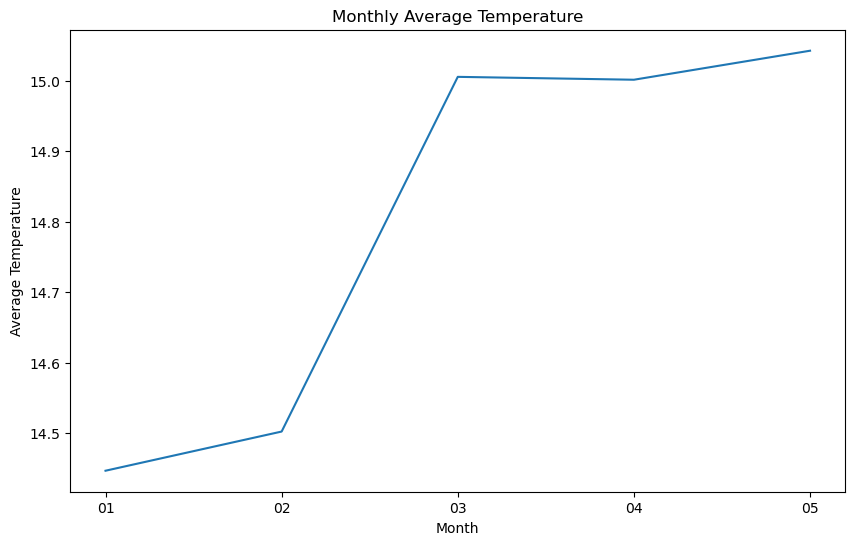

In [6]:
#LINE PLOT OF AVERAGE TEMPERATURE PER MONTH
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_temp["Month"],monthly_avg_temp["Temperature_C"])
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.title("Monthly Average Temperature")
plt.show()

In [7]:
#Correlation Analysis

In [8]:
#Correlation between temperature and precipitation
corr_coef_temp_prec= dataframe["Temperature_C"].corr(dataframe["Precipitation_mm"])
corr_coef_temp_prec

-0.010876229460307871

In [9]:
corr_table_tem_prec = dataframe[["Temperature_C","Precipitation_mm"]]
corr_table_tem_prec

,Temperature_C,Precipitation_mm
0,10.683001,4.020119
1,8.734140,9.111623
2,11.632436,4.607511
3,-8.628976,3.183720
4,39.808213,9.598282
...,...,...
999995,23.416877,3.819833
999996,6.759080,8.182785
999997,15.664465,3.987558
999998,18.999994,4.294325


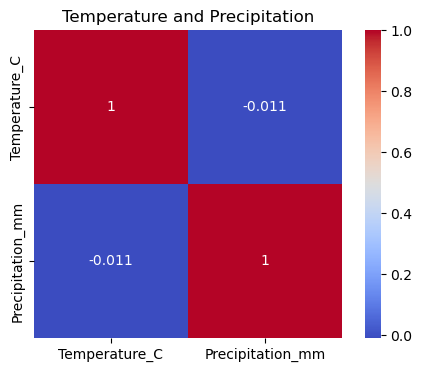

In [10]:
#correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_table_tem_prec.corr(), annot=True, cmap = "coolwarm", square= True)
plt.title("Temperature and Precipitation")
plt.show()

In [11]:
#Average Humidity by location
avg_hum_loc= dataframe.groupby("Location")["Humidity_pct"].mean().to_frame()
avg_hum_loc

,Humidity_pct
Location,
Chicago,60.088798
Dallas,59.959900
Houston,59.967598
Los Angeles,60.072151
New York,60.044688
Philadelphia,60.044902
Phoenix,60.048643
San Antonio,59.932798
San Diego,60.072074


In [12]:
#Days with extreme weather:
dataframe["extreme_days"] = (((dataframe["Temperature_C"] > 35) | (dataframe["Temperature_C"])) & (dataframe["Precipitation_mm"]>10))
dataframe["extreme_days"]

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Name: extreme_days, Length: 1000000, dtype: bool

In [13]:
dataframe

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Year,Month,Day,extreme_days
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540,2024,01,14 21:12:46,False
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161,2024,05,17 15:22:10,False
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951,2024,05,11 09:30:59,False
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303,2024,02,26 17:32:39,False
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622,2024,04,29 13:23:51,False
...,...,...,...,...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119,2024,01,01 20:29:48,False
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558,2024,01,20 15:59:48,False
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909,2024,04,14 08:30:09,False
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036,2024,05,12 20:10:43,False


<Axes: xlabel='Temperature_C', ylabel='Precipitation_mm'>

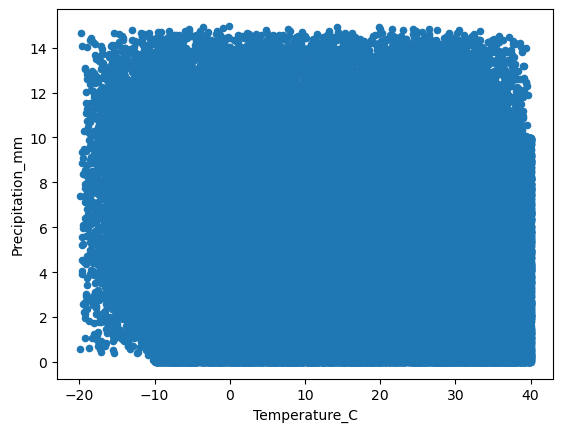

In [14]:
#Relationship between temperature and precipitation
corr_table_tem_prec_plot= dataframe.plot.scatter(x="Temperature_C", y="Precipitation_mm")
corr_table_tem_prec_plot

In [15]:
#Precipitation across different regions
pp_reg = dataframe[["Location","Precipitation_mm"]]
pp_reg

,Location,Precipitation_mm
0,San Diego,4.020119
1,San Diego,9.111623
2,San Diego,4.607511
3,Philadelphia,3.183720
4,San Antonio,9.598282
...,...,...
999995,Dallas,3.819833
999996,San Antonio,8.182785
999997,New York,3.987558
999998,Chicago,4.294325
